In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
obj2=pd.DataFrame({})
obj3=pd.DataFrame({})
obj7=pd.DataFrame({})
periods=['3b','3c','3d','2016Q1','2016Q2','2016Q3','2016Q4','2017Q1','2017Q2','2017Q3','2017Q4','2018Q2']
base_url='E:\practice\LoanStats'
for period in periods:
    obj=pd.read_csv(base_url+period+'.csv',low_memory=False)
    obj['int_rate']=obj['int_rate'].str.replace(r'%', r'').astype('float')/100.0
    obj['issue_d']=pd.to_datetime(obj['issue_d'],format='%b-%y')
    obj2=obj2.append(obj.groupby([obj['issue_d'].dt.year,obj['home_ownership']])['loan_amnt'].agg(['sum']))
    obj3=obj3.add(obj.groupby(obj['issue_d'].dt.year)['int_rate'].agg(['sum','count']),fill_value=0)
    obj7=obj7.add(obj[(obj['int_rate']>0.2) & (obj['annual_inc']<20000)].groupby(obj['issue_d'].dt.year)['int_rate'].agg(['sum','count']),fill_value=0)
periods=['3a','2018Q1']
for period in periods:
    obj=pd.read_csv(base_url+period+'.csv',low_memory=False)
    obj['int_rate']=obj['int_rate'].str.replace(r'%', r'').astype('float')/100.0
    obj['issue_d']=obj['issue_d'].str.zfill(6)
    obj['issue_d']=pd.to_datetime(obj['issue_d'],format='%y-%b')
    obj2=obj2.append(obj.groupby([obj['issue_d'].dt.year,obj['home_ownership']])['loan_amnt'].agg(['sum']))
    obj3=obj3.add(obj.groupby(obj['issue_d'].dt.year)['int_rate'].agg(['sum','count']),fill_value=0)
    obj7=obj7.add(obj[(obj['int_rate']>0.2) & (obj['annual_inc']<20000)].groupby(obj['issue_d'].dt.year)['int_rate'].agg(['sum','count']),fill_value=0)

In [39]:
obj10=obj2.groupby(['issue_d','home_ownership'])['sum'].agg(['sum']).reset_index()

In [40]:
pivot_df = obj10.pivot(index='issue_d', columns='home_ownership', values='sum').fillna(0)

In [42]:
pivot_df

home_ownership,ANY,MORTGAGE,NONE,OTHER,OWN,RENT
issue_d,,,,,,
2007.0,0.0,2.056375e+06,47000.0,0.0,403525.0,2.470575e+06
2008.0,0.0,9.437500e+06,10000.0,383450.0,1189050.0,1.009925e+07
2009.0,0.0,2.203892e+07,0.0,890075.0,4608450.0,2.439080e+07
2010.0,0.0,6.604688e+07,0.0,35400.0,9003825.0,5.690645e+07
2011.0,0.0,1.388340e+08,0.0,16000.0,17920625.0,1.049132e+08
2012.0,0.0,3.750106e+08,616975.0,642525.0,52026575.0,2.901143e+08
2013.0,0.0,1.170728e+09,0.0,0.0,153229675.0,6.588080e+08
2014.0,5000.0,1.987983e+09,0.0,0.0,324740375.0,1.191111e+09
2015.0,58300.0,3.491686e+09,0.0,0.0,681044525.0,2.244820e+09


In [43]:
obj4=obj3['sum']/obj3['count']
obj5=obj4.reset_index()
obj5.columns=['Year','Interest rate']

In [44]:
obj5

,Year,Interest rate
0,2007.0,0.118251
1,2008.0,0.120620
2,2009.0,0.124372
3,2010.0,0.119853
4,2011.0,0.122234
5,2012.0,0.136378
6,2013.0,0.145320
7,2014.0,0.137694
8,2015.0,0.125994
9,2016.0,0.130420


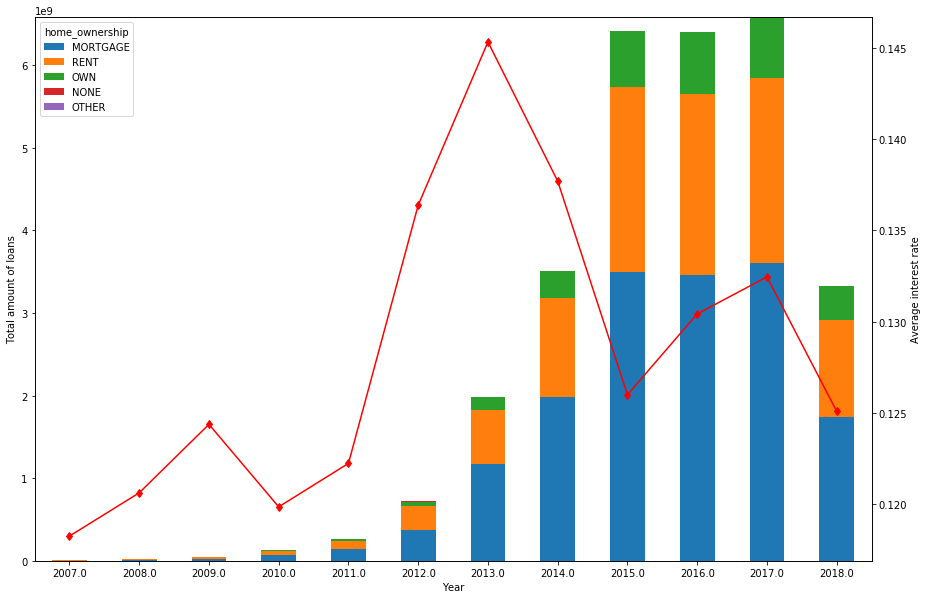

In [45]:
ax=pivot_df.loc[:,['MORTGAGE','RENT','OWN','NONE', 'OTHER']].plot.bar(stacked=True,figsize=(15, 10))
obj5['Interest rate'].plot(kind='line',color='r', marker='d',secondary_y=True).set_ylabel('Average interest rate')
ax.set_ylabel('Total amount of loans')
ax.set_xlabel('Year')
plt.show()

In [ ]:
# As we can see from the image above, total amount of loans borrowed increasing gradually from 2007 to 2015 but stable after
# 2015. 2018 contains only first two quarters of data and it was roughly half of 2017 so we can predict the amount for the 
# whole year should have little change compared to previous year. Moreover, throughout the history, percentage of borrowers
# with different home ownership stays stable too with mortgage making up the largest amount of borrowing. 

# When we look at the average interest rates over the years, there are interesting phenomina. Average interest rate started 
# increasing significantly from 2010 to 2013. This was the same trend with the total amount borrowed indicating that it was
# a growth period for P2P loans with more and more people aware the existence of it. However, it dropped from 2013 to 2015.
# This, with the increase of amount borrowed, was probably due to the money flooded in from the lenders driving interest rate
# lower. But after 2015, it should reach an equilibrium number like the total amount of loans, ranging from 12.5% to 13.5%.